In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions # Import a nice function for plotting decision boudaries

sns.set_theme() # Set the Seaborn theme

data = pd.read_csv("Gender Classification.csv") # Read the iris dataset into a pandas DataFrame object

## Data
Taking a look at the dataset

In [2]:
data #showing the dataset  

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Goal: 
We want to classify the genders based on forhead height and width.

In [23]:
y = data.iloc[0:1000].Gender.values # assigning y as a numpy array contaning the first 1000 gender values 

y #displaying the array

array(['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Fema

Since every value in the gender column are strings, we need to convert them to numerical values.

In [20]:
y = np.where(y == 'Male', -1, 1) # Converting each entry of y with Male to -1 and 0 otherwise (Women)

y #displaying the array of the first 1000 rows of the gender column with their new numercical value

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [21]:
X = data[["Forehead Width (cm)", "Forehead Height (cm)"]].iloc[:1000].values # Storing the desired feature measurements in the matrix X

X

array([[11.8,  6.1],
       [14. ,  5.4],
       [11.8,  6.3],
       ...,
       [14.1,  5.3],
       [12.1,  6.2],
       [14.9,  6. ]])

In [22]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [12]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

C:\Users\gonza\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


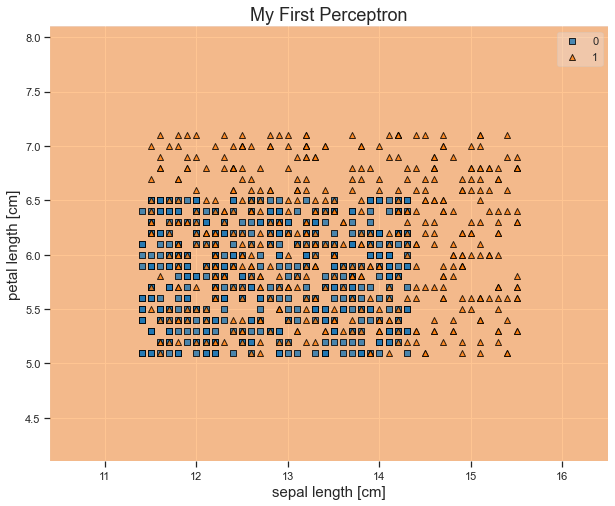

In [13]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()

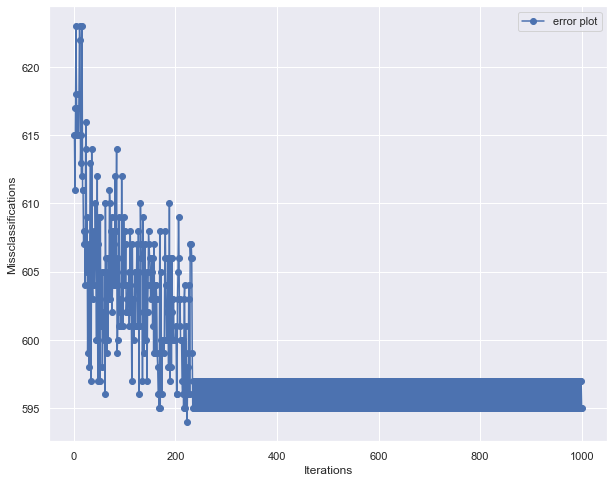

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

Based on the results above, the Perceptron model does not seem to be a good for this dataset. The data points are too sporadic, and cannot be seperated by a linear funciton. Perhaps the Linear Regression model would be a more suitable method to use on this dataset. 